
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [167]:
# Ваш код здесь
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 2. Загрузка данных

In [56]:
# Ваш код здесь

# Посмотрим наименования файлов
files = !ls
print(f'Файлы  проекта: {files}')
# Загрузим датасет
print(f'Файл с данными: {files[0]}')
df = pd.read_csv(files[0])
df.info()
df.head(3)

Файлы  проекта: ['4.7 sales.csv', '4.7 Практическая работа.ipynb']
Файл с данными: 4.7 sales.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal


In [84]:
df.nunique()

SalePrice        663
GrLivArea        861
GarageArea       441
OverallQual       10
Street             2
SaleCondition      6
dtype: int64

### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

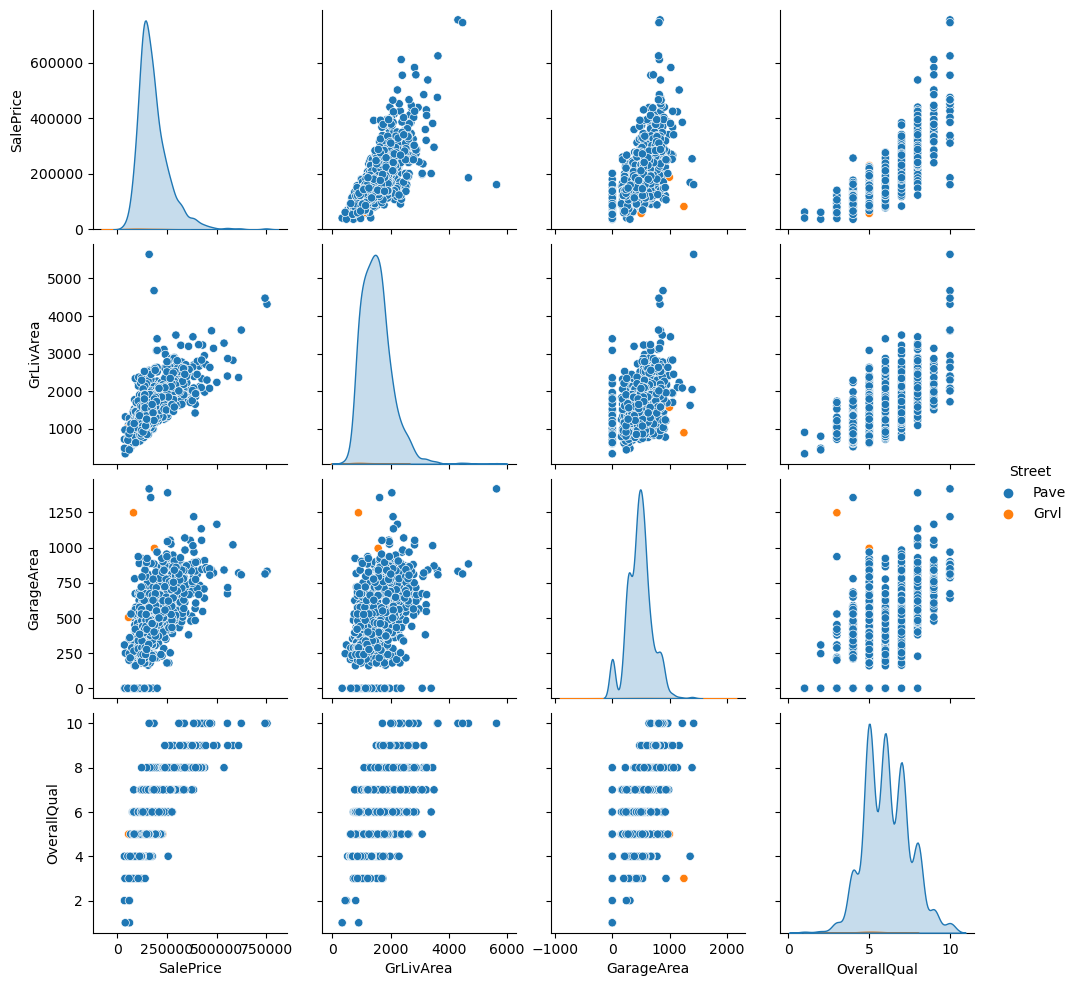

In [100]:
# Ваш код здесь

# Визуализируем корреляцию признаков с разбиением по улицам
sns.pairplot(data=df, diag_kind="kde", hue="Street")

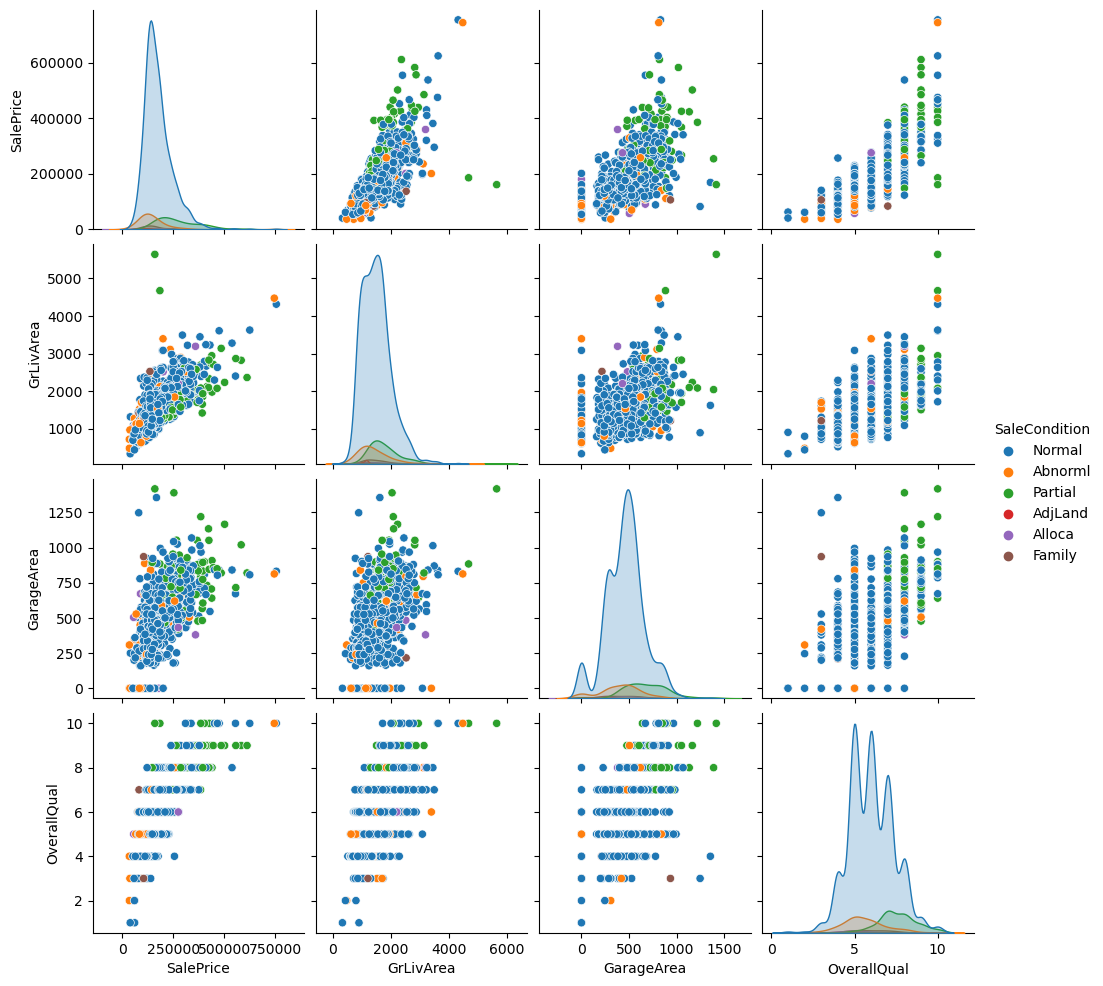

In [101]:
# Визуализируем корреляцию признаков с разбиением по условиям сделки
sns.pairplot(data=df, diag_kind="kde", hue="SaleCondition")

In [109]:
# Закодируем категориальные переменные
df_code = pd.get_dummies(df)
df_code.head(3)

,SalePrice,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1710,548,7,0,1,0,0,0,0,1,0
1,181500,1262,460,6,0,1,0,0,0,0,1,0
2,223500,1786,608,7,0,1,0,0,0,0,1,0


In [114]:
# Добавим два признака характеризующие комфортность жилья:
#  - общая площадь равная сумме жилой площади площади гаража и характеризующая совокупный размер жилья
#  - соотношение жилой площади и площади гаража, характеризующее обеспеченность каждого жильца машиноместом
df_code['SumArea'] = df_code.apply(lambda x: x['GrLivArea']+x['GarageArea'], axis=1)
df_code['ProvisionParking'] = df_code.apply(lambda x: x['GarageArea']/x['GrLivArea'], axis=1)
df_code.head(3)

,SalePrice,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SumArea,ProvisionParking
0,208500,1710,548,7,0,1,0,0,0,0,1,0,2258.0,0.320468
1,181500,1262,460,6,0,1,0,0,0,0,1,0,1722.0,0.364501
2,223500,1786,608,7,0,1,0,0,0,0,1,0,2394.0,0.340426


**Выводы**
1) Графики корреляции признаков и целевой переменной показывают следующее:  
 - по улицу "Grvl" практически нет продаж;  
 - и целевая переменная и признаки распределены приблизетельно по нормальному закону;
 - наибольшая корреляция стоимости жилья наблюдается с признаками GrLivArea и OverallQual;
 - большинство продаваемого жилья имееет нормальные условия проживания

### 4. Разделение на обучающую и тестовую выборки

In [120]:
# Ваш код здесь
train, test = train_test_split(df_code, train_size=0.7, random_state=3)

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [127]:
# Ваш код здесь
fit_columns = list(df_code.columns)[1:]
lr = LinearRegression()
lr.fit(train[fit_columns], train['SalePrice'])

LinearRegression()

In [130]:
print('Смещение модели "wo": ', lr.intercept_)
print( 'Коэффициенты модели "wl":\n', lr.coef_)

Смещение модели "wo":  241074780888.84805
Коэффициенты модели "wl":
 [-4.18403382e+15 -4.18403382e+15  2.41383788e+04 -2.25569071e+11
 -2.25569056e+11 -1.55058109e+10 -1.55057954e+10 -1.55058193e+10
 -1.55058227e+10 -1.55058040e+10 -1.55057795e+10  4.18403382e+15
 -5.04457438e+04]


### 6. Получение предсказаний для обучающей и тестовой выборок

In [132]:
# Ваш код здесь
predict_train = lr.predict(train[fit_columns])
predict_test = lr.predict(test[fit_columns])

### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 


Качество модели на обучающей выборке:
 - по метрике MSE: 1608328467.1586733
 - по метрике MAE: 27032.997878266127

Качество модели на тестовой выборке:
 - по метрике MSE: 1594633034.9768271
 - по метрике MAE: 26749.85267086507


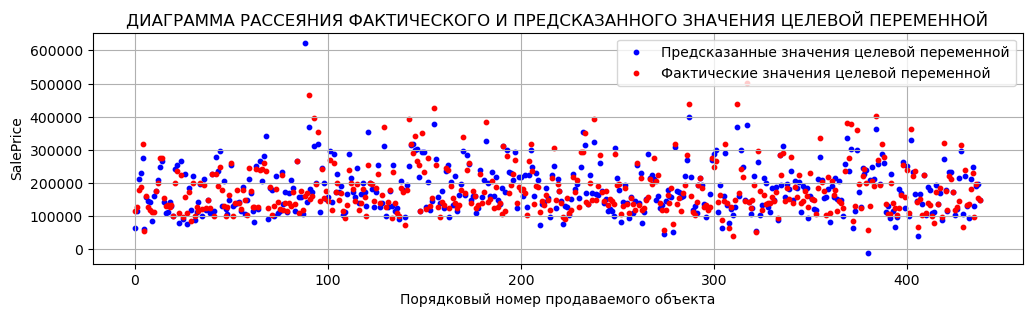

In [183]:
# Ваш код здесь

# Посчитаем качество модели на обучающей выборке
print('\nКачество модели на обучающей выборке:')
print(f' - по метрике MSE: {mean_squared_error(train["SalePrice"], predict_train)}')
print(f' - по метрике MAE: {mean_absolute_error(train["SalePrice"], predict_train)}')

# Посчитаем качество модели на тестовой выборке
print('\nКачество модели на тестовой выборке:')
print(f' - по метрике MSE: {mean_squared_error(test["SalePrice"], predict_test)}')
print(f' - по метрике MAE: {mean_absolute_error(test["SalePrice"], predict_test)}')


# Построим диаграмму рассеяния тестового и прогнозного значений целевой переменной
plt.figure(figsize=(12, 3))
plt.scatter(range(len(predict_test)), predict_test, s=10, c='b',
            label='Предсказанные значения целевой переменной')
plt.scatter(range(len(predict_test)), test['SalePrice'], s=10, c='r',
            label='Фактические значения целевой переменной')
plt.xlabel('Порядковый номер продаваемого объекта')
plt.ylabel('SalePrice')
plt.title('ДИАГРАММА РАССЕЯНИЯ ФАКТИЧЕСКОГО И ПРЕДСКАЗАННОГО ЗНАЧЕНИЯ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ', fontsize=12)
plt.legend()
plt.grid()
plt.show()